In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d prasad22/healthcare-dataset

Dataset URL: https://www.kaggle.com/datasets/prasad22/healthcare-dataset
License(s): CC0-1.0
  0% 0.00/2.91M [00:00<?, ?B/s]
100% 2.91M/2.91M [00:00<00:00, 112MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/healthcare-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [58]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [86]:
medical_data = pd.read_csv('healthcare_dataset.csv')
medical_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [87]:
medical_data.shape

(55500, 15)

In [88]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [89]:
medical_data.value_counts('Test Results')

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

In [90]:
for columns in medical_data.columns:
  print(columns)

Name
Age
Gender
Blood Type
Medical Condition
Date of Admission
Doctor
Hospital
Insurance Provider
Billing Amount
Room Number
Admission Type
Discharge Date
Medication
Test Results


In [91]:
# Select the necessary columns
columns = ['Age', 'Gender','Blood Type', 'Medical Condition', 'Date of Admission', 'Test Results', 'Medication']
medical_data = medical_data[columns]

In [92]:
# Handle missing values if any (simple example with forward fill)
medical_data.fillna(method='ffill', inplace=True)

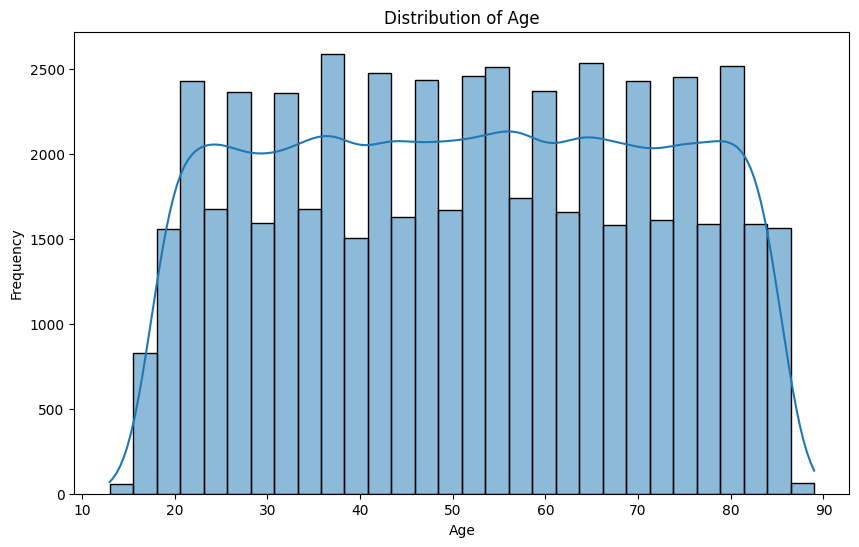

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(medical_data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-94-93b4cdb855fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=medical_data,palette = "Set1")


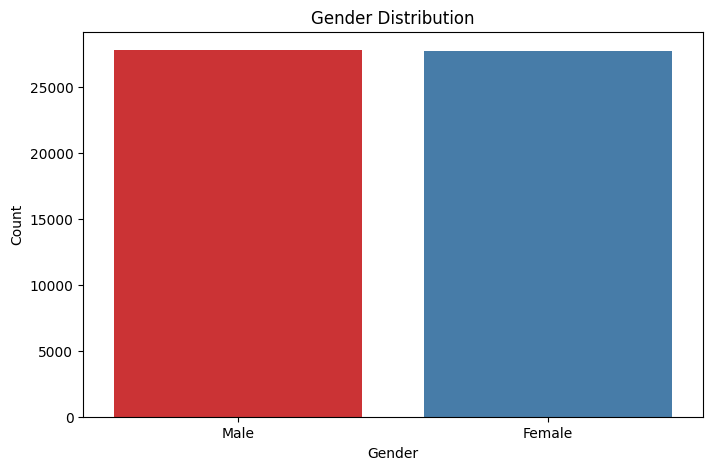

In [94]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=medical_data,palette = "Set1")
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-95-e87985c7e83b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Blood Type', data=medical_data,palette = "Set2")


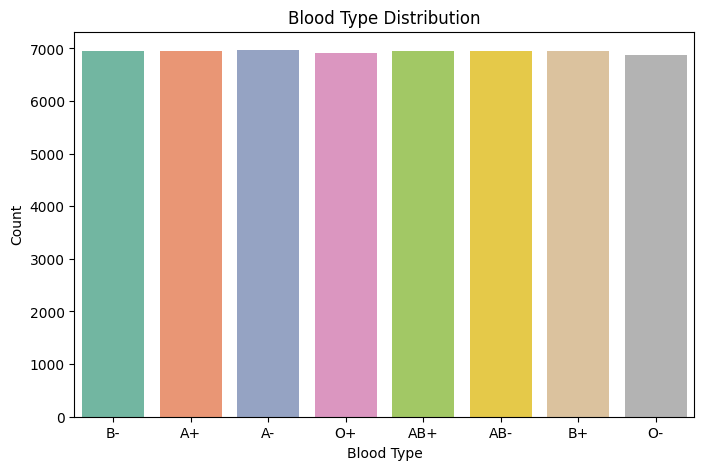

In [95]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Blood Type', data=medical_data,palette = "Set2")
plt.title('Blood Type Distribution')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.show()

<ipython-input-96-cdb48c7f9938>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Medical Condition', data=medical_data, order=medical_data['Medical Condition'].value_counts().index,palette = "Set1")


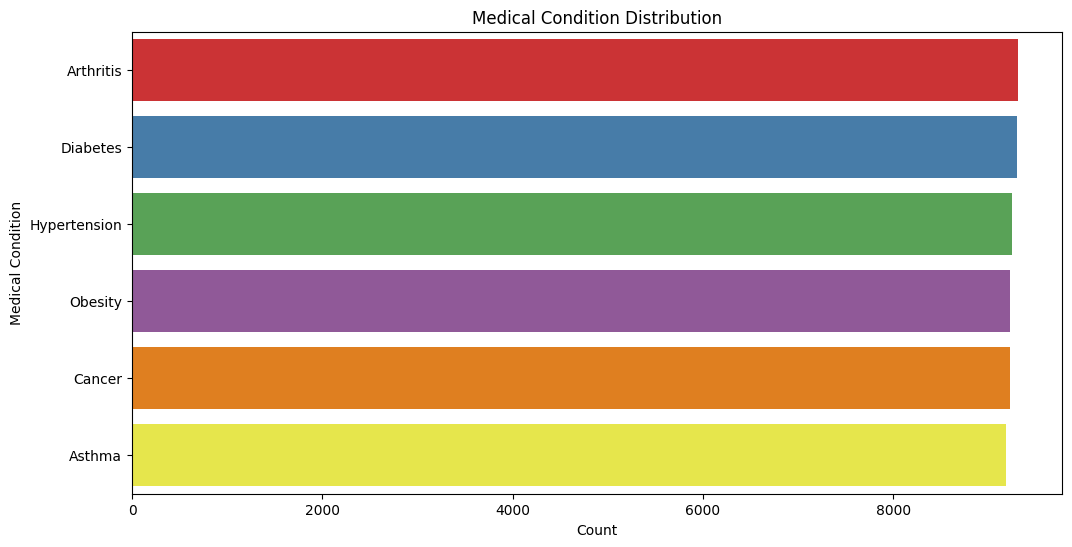

In [96]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Medical Condition', data=medical_data, order=medical_data['Medical Condition'].value_counts().index,palette = "Set1")
plt.title('Medical Condition Distribution')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.show()

<ipython-input-97-79d9295a55bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medical Condition', y='Test Results', data=medical_data,palette = "Set2")


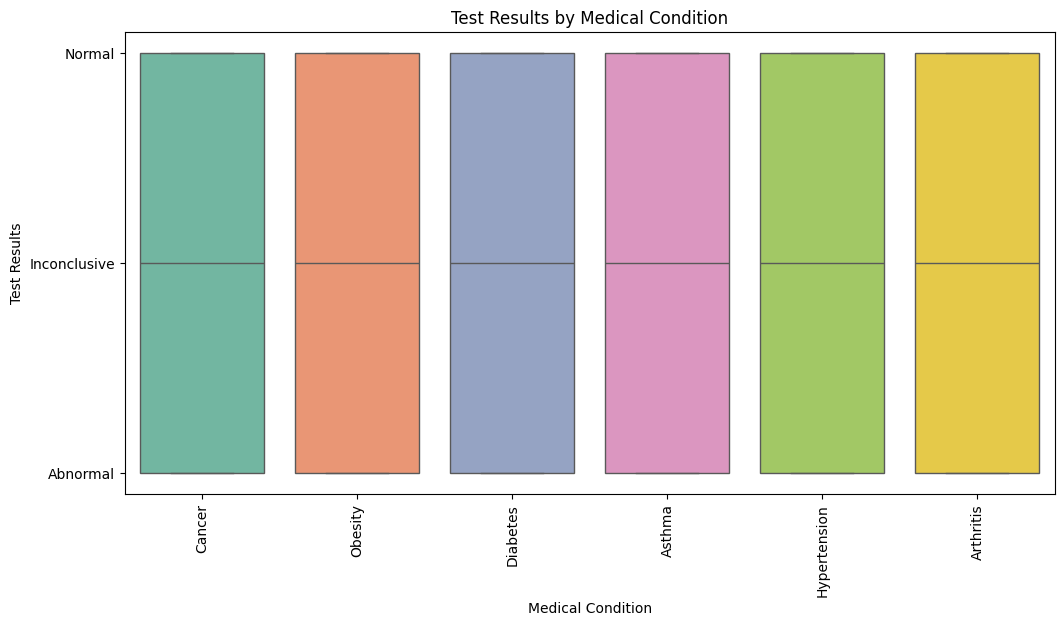

In [97]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Medical Condition', y='Test Results', data=medical_data,palette = "Set2")
plt.title('Test Results by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Test Results')
plt.xticks(rotation=90)
plt.show()

<ipython-input-98-f3ad1034a373>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medical Condition', y='Age', data=medical_data,palette = 'Set2')


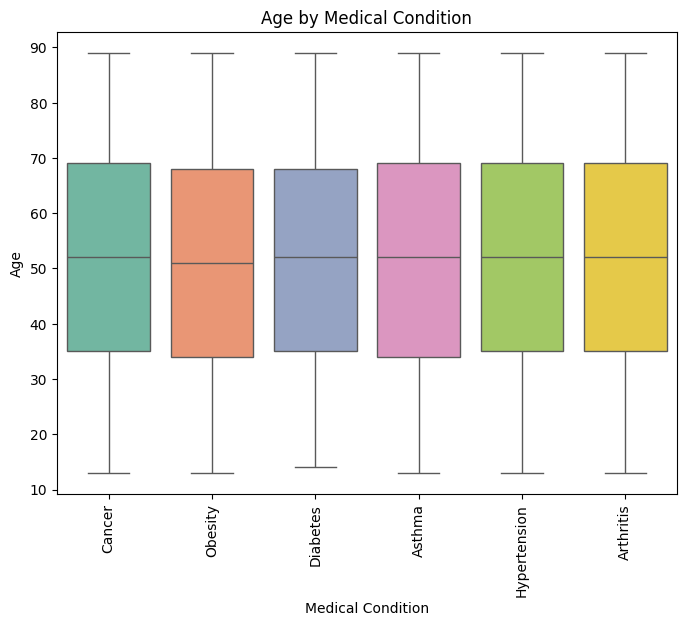

In [98]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Medical Condition', y='Age', data=medical_data,palette = 'Set2')
plt.title('Age by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

<ipython-input-102-985e6cb31adc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Admission Month', data=medical_data, palette='viridis')


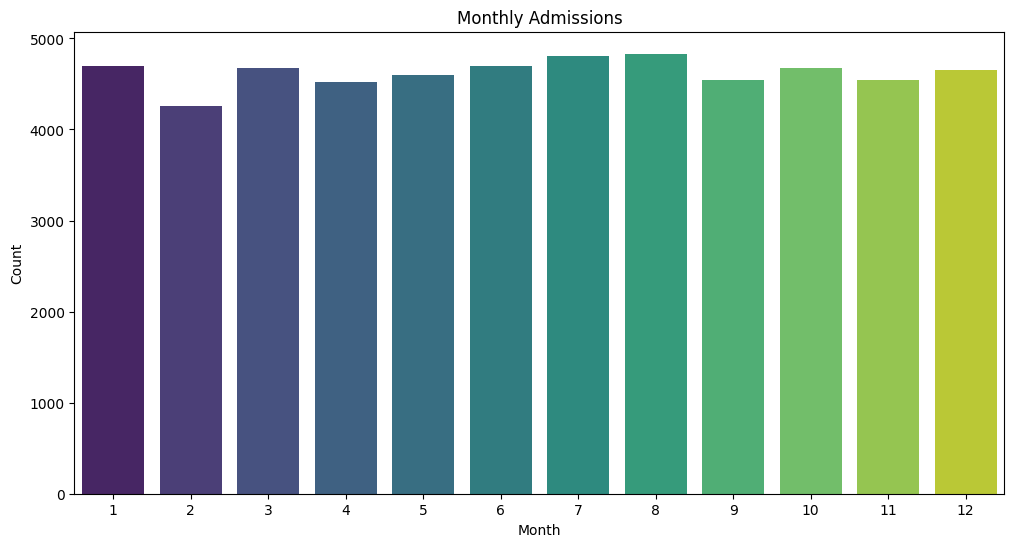

In [102]:
# Convert 'Date of Admission' to datetime
medical_data['Date of Admission'] = pd.to_datetime(medical_data['Date of Admission'])

# Extract month and year
medical_data['Admission Month'] = medical_data['Date of Admission'].dt.month
medical_data['Admission Year'] = medical_data['Date of Admission'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(x='Admission Month', data=medical_data, palette='viridis')
plt.title('Monthly Admissions')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [104]:
medical_data.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Test Results,Medication,Admission Month,Admission Year
0,30,Male,B-,Cancer,2024-01-31,Normal,Paracetamol,1,2024
1,62,Male,A+,Obesity,2019-08-20,Inconclusive,Ibuprofen,8,2019
2,76,Female,A-,Obesity,2022-09-22,Normal,Aspirin,9,2022
3,28,Female,O+,Diabetes,2020-11-18,Abnormal,Ibuprofen,11,2020
4,43,Female,AB+,Cancer,2022-09-19,Abnormal,Penicillin,9,2022


In [105]:
medical_data.value_counts('Medical Condition')

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

In [106]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Age                55500 non-null  int64         
 1   Gender             55500 non-null  object        
 2   Blood Type         55500 non-null  object        
 3   Medical Condition  55500 non-null  object        
 4   Date of Admission  55500 non-null  datetime64[ns]
 5   Test Results       55500 non-null  object        
 6   Medication         55500 non-null  object        
 7   Admission Month    55500 non-null  int32         
 8   Admission Year     55500 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(5)
memory usage: 3.4+ MB


In [107]:
label_columns = ['Gender','Blood Type','Medical Condition','Test Results', 'Medication']
label_encoder = LabelEncoder()
for column in label_columns:
    medical_data[column] = label_encoder.fit_transform(medical_data[column])

In [108]:
medical_data

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Test Results,Medication,Admission Month,Admission Year
0,30,1,5,2,2024-01-31,2,3,1,2024
1,62,1,0,5,2019-08-20,1,1,8,2019
2,76,0,1,5,2022-09-22,2,0,9,2022
3,28,0,6,3,2020-11-18,0,1,11,2020
4,43,0,2,2,2022-09-19,0,4,9,2022
...,...,...,...,...,...,...,...,...,...
55495,42,0,6,1,2020-08-16,0,4,8,2020
55496,61,0,3,5,2020-01-23,2,0,1,2020
55497,38,0,4,4,2020-07-13,0,1,7,2020
55498,43,1,7,0,2019-05-25,0,1,5,2019


In [109]:
# Convert 'Date of Admission' to datetime
medical_data['Date of Admission'] = pd.to_datetime(medical_data['Date of Admission'])

# Extract features from 'Date of Admission'
medical_data['Admission Year'] = medical_data['Date of Admission'].dt.year
medical_data['Admission Month'] = medical_data['Date of Admission'].dt.month
medical_data['Admission Day'] = medical_data['Date of Admission'].dt.day

# Drop the original 'Date of Admission' column
medical_data.drop(columns=['Date of Admission'], inplace=True)

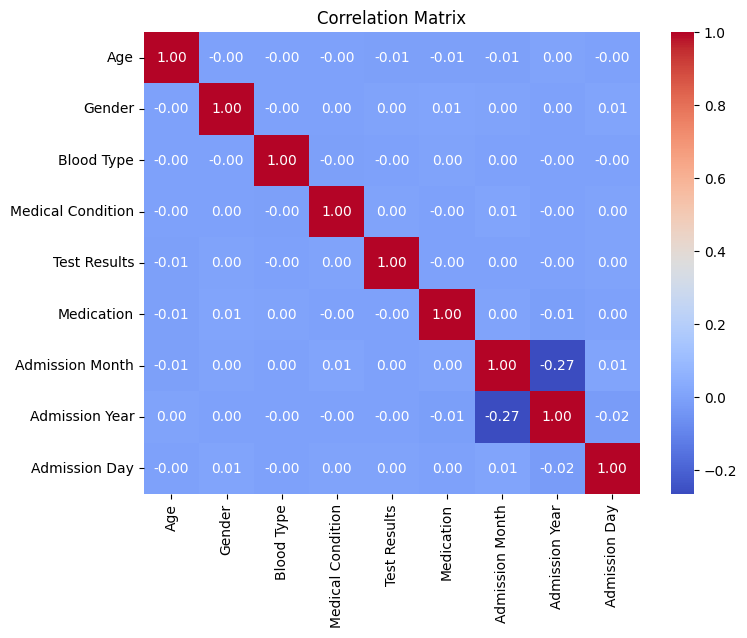

In [110]:
plt.figure(figsize=(8, 6))
corr = medical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

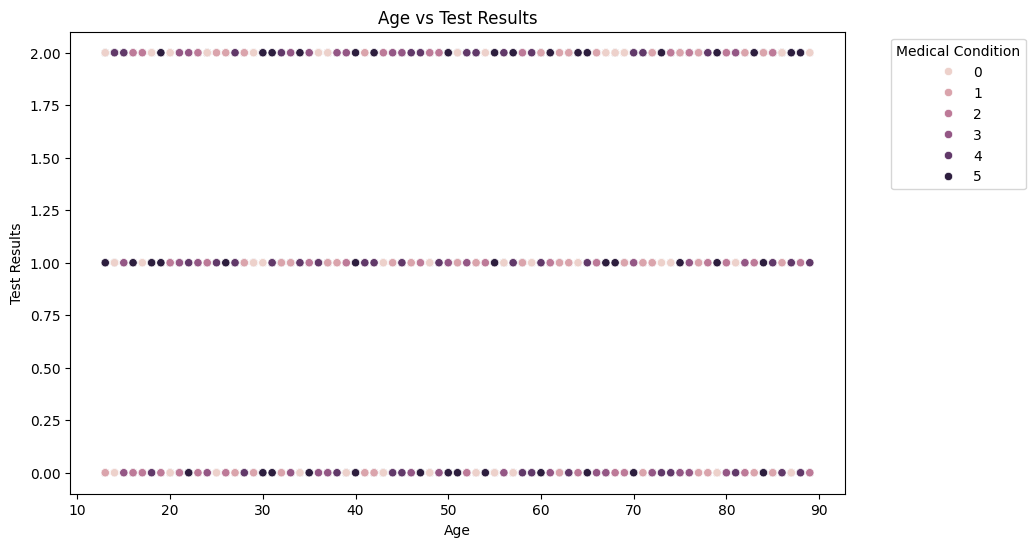